<AxesSubplot:ylabel='Segmentation'>

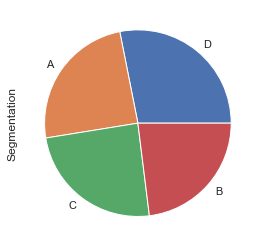

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

testFilepath=r"C:\Users\s-mkandemir\Anaconda3\seg_test.csv"
trainFilepath=r"C:\Users\s-mkandemir\Anaconda3\seg_train.csv"
testData=pd.read_csv(testFilepath)
trainData=pd.read_csv(trainFilepath)
trainData.drop(['ID'], axis=1)
trainData['Segmentation'].value_counts()
trainData['Segmentation'].value_counts().plot.pie()

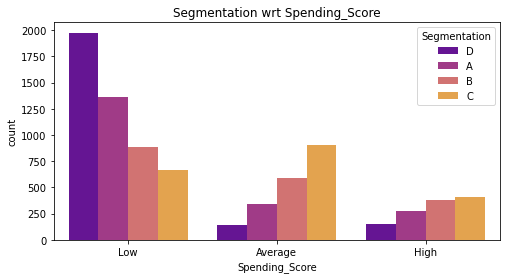

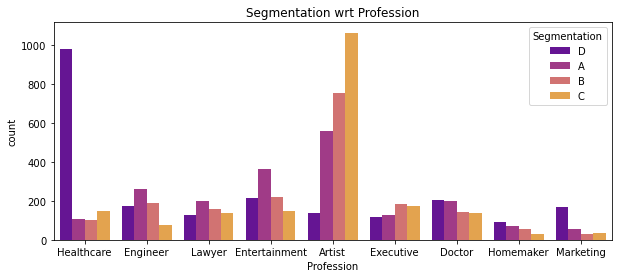

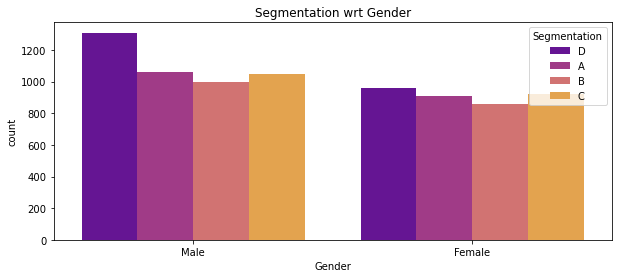

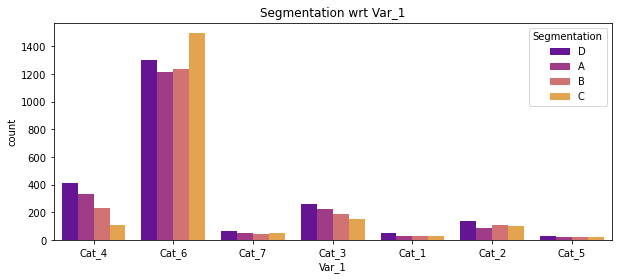

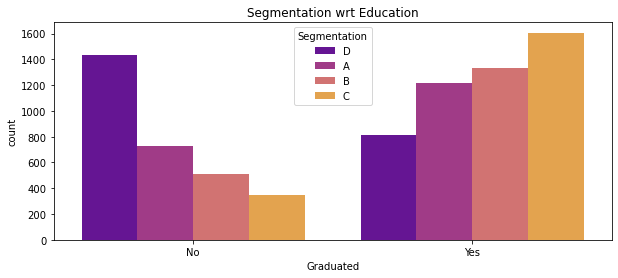

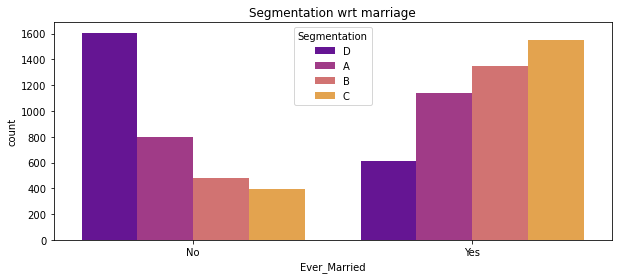

In [2]:
plt.figure(figsize=(8,4))
sn.countplot(x='Spending_Score',hue='Segmentation', data=trainData, palette='plasma')
plt.title("Segmentation wrt Spending_Score")
plt.show()
plt.figure(figsize=(10,4))
sn.countplot(x='Profession',hue='Segmentation', data=trainData, palette='plasma')
plt.title("Segmentation wrt Profession")
plt.show()
plt.figure(figsize=(10,4))
sn.countplot(x='Gender',hue='Segmentation', data=trainData, palette='plasma')
plt.title("Segmentation wrt Gender")
plt.show()
plt.figure(figsize=(10,4))
sn.countplot(x='Var_1',hue='Segmentation', data=trainData, palette='plasma')
plt.title("Segmentation wrt Var_1")
plt.show()
plt.figure(figsize=(10,4))
sn.countplot(x='Graduated',hue='Segmentation', data=trainData, palette='plasma')
plt.title("Segmentation wrt Education")
plt.show()
plt.figure(figsize=(10,4))
sn.countplot(x='Ever_Married',hue='Segmentation', data=trainData, palette='plasma')
plt.title("Segmentation wrt marriage")
plt.show()

In [6]:
trainData.dropna(inplace = True)


In [8]:
le = LabelEncoder()
trainData['Gender'] = le.fit_transform(trainData['Gender'])
trainData['Ever_Married'] = le.fit_transform(trainData['Ever_Married'])
trainData['Graduated'] = le.fit_transform(trainData['Graduated'])
trainData['Spending_Score'] = le.fit_transform(trainData['Spending_Score'])
trainData['Segmentation'] = le.fit_transform(trainData['Segmentation'])

In [9]:
trainData = trainData.drop('ID', axis = 1)
trainData.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,Healthcare,1.0,2,4.0,Cat_4,3
2,0,1,67,1,Engineer,1.0,2,1.0,Cat_6,1
3,1,1,67,1,Lawyer,0.0,1,2.0,Cat_6,1
5,1,1,56,0,Artist,0.0,0,2.0,Cat_6,2
6,1,0,32,1,Healthcare,1.0,2,3.0,Cat_6,2


In [11]:
trainData = pd.get_dummies(trainData, columns = ['Profession'])
trainData = pd.get_dummies(trainData, columns = ['Var_1'])
trainData.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.0,2,4.0,3,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,67,1,1.0,2,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,67,1,0.0,1,2.0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,1,56,0,0.0,0,2.0,2,1,0,...,0,0,0,0,0,0,0,0,1,0
6,1,0,32,1,1.0,2,3.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
trainData.corr()['Segmentation'].sort_values()


Age                        -0.231696
Ever_Married               -0.206909
Graduated                  -0.172233
Profession_Artist          -0.137655
Profession_Entertainment   -0.117926
Profession_Engineer        -0.093229
Profession_Lawyer          -0.067182
Var_1_Cat_6                -0.013014
Profession_Executive       -0.010167
Var_1_Cat_3                -0.008727
Profession_Doctor          -0.008625
Var_1_Cat_4                -0.001951
Var_1_Cat_7                 0.001620
Profession_Homemaker        0.003346
Var_1_Cat_5                 0.003610
Work_Experience             0.006982
Var_1_Cat_1                 0.015685
Var_1_Cat_2                 0.029776
Gender                      0.033590
Spending_Score              0.084895
Profession_Marketing        0.090604
Family_Size                 0.199412
Profession_Healthcare       0.367225
Segmentation                1.000000
Name: Segmentation, dtype: float64

In [15]:
X = trainData.drop('Segmentation', axis = 1)
y = trainData.Segmentation

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
acc_frame=pd.DataFrame(d)
acc_frame.sort_values(by='Accuracy',ascending=False)

C:\Users\s-mkandemir\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Modelling Algo,Accuracy
6,GradientBoostingClassifier,0.541635
0,LogisticRegression,0.519130
1,LinearSVM,0.510128
2,rbfSVM,0.504126
4,RandomForestClassifier,0.483121
3,KNearestNeighbors,0.475619
7,GaussianNB,0.465116
5,DecisionTree,0.441860


In [28]:
cm=(confusion_matrix(y_test, pred))
print(cm)

[[148  64  41  62]
 [ 70 109  94  29]
 [ 33  65 200  48]
 [ 72  19  13 266]]


<AxesSubplot:title={'center':'Heatmap of Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

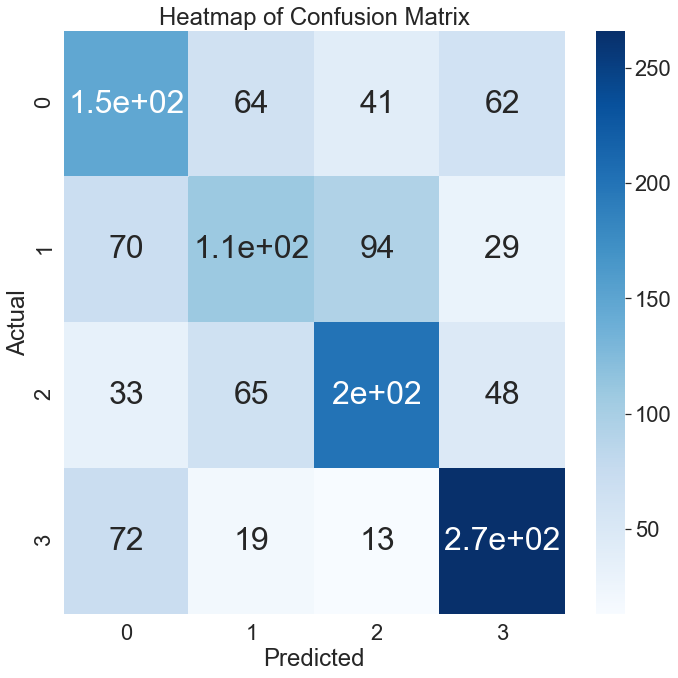

In [34]:
cmDf=pd.DataFrame(cm,columns=np.unique(y_test),index=np.unique(y_test))
cmDf.index.name="Actual"
cmDf.columns.name="Predicted"
plt.figure(figsize=(10,10))
plt.title('Heatmap of Confusion Matrix')
sn.set(font_scale=2.0)
sn.heatmap(cmDf, cmap="Blues", annot=True,annot_kws={"size": 32})